# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**a) Apply the random walk Metropolis algorithm using N = 10000 and s = 1. Use the generated samples (x1, . . . xN ) to construct a histogram and a kernel density plot in the same figure. Note that these provide estimates of f (x).Overlay a graph of f (x) on this figure to visualise the quality of these estimates. Also, report the sample mean and standard deviation of the generated samples.**

The probability density function is defined

In [2]:
def pdf_function(x):
    return 0.5 * np.exp(-abs(x))

The function for Metropolis-Hastings algorithm is defined that return an array of samples generated from the PDF distribution using the algorithm when called.

In [3]:
def metropolis_hastings(initial_value, N, s):
    samples = [initial_value]
    
    for i in range(1, N):
        x_minus_1 = samples[-1]
        
        x_random = np.random.normal(loc = x_minus_1, #a random number will be generated from a normal distribution centred around the previous number x_minus_1
                                   scale = s)
        
        ratio = pdf_function(x_random)/pdf_function(x_minus_1) #formula to compute the ratio
        
        u = np.random.uniform(0, 1) #generate a random number from a uniform distribution ranging from 0 to 1
            
        if u < ratio:
            samples.append(x_random) #if else statement that appends the chosen sample 
        else:
            samples.append(x_minus_1)
    
    return np.array(samples) #return an array of samples after the iteration ends

Defining the parameters and calling the function to generate an array of samples.

In [4]:
N = 100000 #Set Parameters
s = 1
initial_value = 0

samples = metropolis_hastings(initial_value, N, s)

Using the results a histogram and KDE plot is generated.

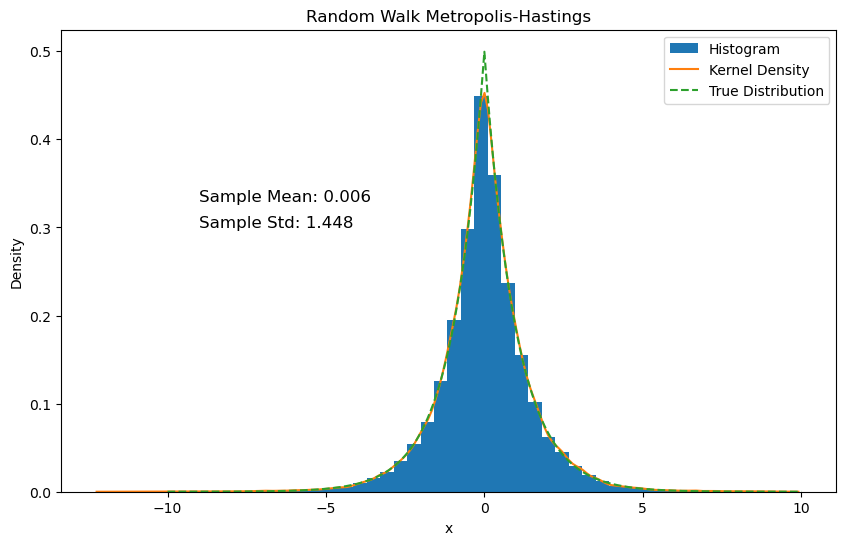

In [5]:
plt.figure(figsize =(10, 6))

plt.hist(samples, bins = 50, density = True, label = 'Histogram')

sns.kdeplot(samples, label = 'Kernel Density')

# Create histogram and density plot
x_values = np.linspace(-10, 10, 10000)
plt.plot(x_values, pdf_function(x_values), label='True Distribution', linestyle='--') #creating a lineplot of the true density distribution to compare with the sample distribution created from the metropolis-hastings algorithm

plt.title('Random Walk Metropolis-Hastings')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

sample_mean = np.mean(samples)
sample_std = np.std(samples)

plt.text(-9, 0.33, f'Sample Mean: {sample_mean:.3f}', fontsize=12) #Print mean and std values on plot
plt.text(-9, 0.3, f'Sample Std: {sample_std:.3f}', fontsize=12)

plt.show()

In [6]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

print(f'Sample Mean is {sample_mean}')
print(f'Sample Standard Deviation is {sample_std}')

Sample Mean is 0.005557085647153542
Sample Standard Deviation is 1.4483582675296793


**b) The operations in part 1(a) are based on the assumption that the algorithm has converged. One of the most widely used convergence diagnostics is the so-called R hat value.**

**In general, values of R hat close to 1 indicate convergence, and it is usually desired for R hat to be lower than 1.05. Calculate the R hat for the random walk Metropolis algorithm with N = 2000, s = 0.001 and J = 4. Keeping N and J fixed, provide a plot of the values of R hat over a grid of s values in the interval between 0.001 and 1.**

The function to compute R hat value is defined.

In [7]:
def calculate_r(B, W):
    return np.sqrt((B+W) / W)

We define the parameters to address part(b) and create an array to store the r-values

In [8]:
N = 2000 #Set Parameters
J = 4
s_values = np.linspace(0.001, 1, 1000)
R_Values = []

initial_values = np.random.choice(np.arange(30), size = J, replace = False) #Random initial values are defined depending on the number of chain.

Iterating over a sequence of s values and returning an array of r-values.

In [9]:
for s in s_values:
    chains = [metropolis_hastings(initial_value, N, s) for initial_value in initial_values]#using list comprehension to iterate across each initial value, the algorithm generate J chanes for each s value using the algorithm.
    
    chain_sample_means =[np.mean(chain) for chain in chains] 
    chain_sample_variances = [np.var(chain) for chain in chains]
    
    W = np.mean(chain_sample_variances)
    M = np.mean(chain_sample_means)
    
    B = np.mean([(within_mean - M)**2 for within_mean in chain_sample_means])
    
    R = calculate_r(B, W) # Compute R hat value
    R_Values.append(R)

In [10]:
print("Initial values used to compute R hat:", initial_values)
print("R hat value for N = 2000, s = 0.001, and J = 4:", R_Values[0])
print("R hat value for N = 2000, s = 0.5, and J = 4:", R_Values[499])

Initial values used to compute R hat: [17 19  3  8]
R hat value for N = 2000, s = 0.001, and J = 4: 293.50564039520134
R hat value for N = 2000, s = 0.5, and J = 4: 1.0202812326162582


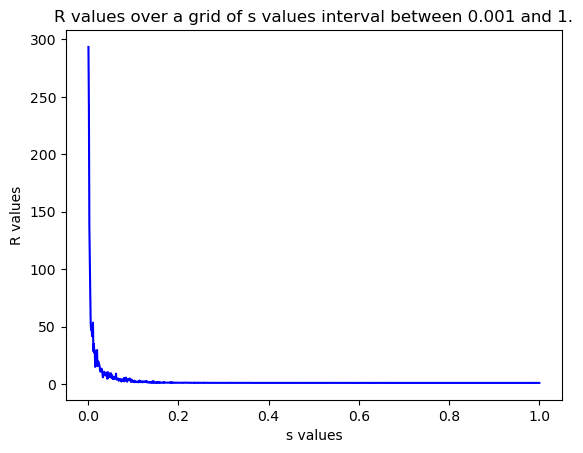

Initial values used to compute R hat: [17 19  3  8]
R hat value for N = 2000, s = 0.001, and J = 4: 293.50564039520134
R hat value for N = 2000, s = 0.5, and J = 4: 1.0202812326162582


In [11]:
plt.plot(s_values, R_Values, linestyle='-', color='b')
plt.xlabel('s values')
plt.ylabel('R values')
plt.title('R values over a grid of s values interval between 0.001 and 1.')
plt.show()
print("Initial values used to compute R hat:", initial_values)
print("R hat value for N = 2000, s = 0.001, and J = 4:", R_Values[0])
print("R hat value for N = 2000, s = 0.5, and J = 4:", R_Values[499])